# Visualise a Multi-Label Classification Tree as an Interactive Plotly Sankey Diagram

Begin by loading the `DecisionTree_to_Sankey` class and other relevant libraries

In [1]:
import sys
import os
# Get the current working directory (cwd) and go one level up
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.DecisionTree_To_Sankey import DecisionTree_to_Sankey
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
from sklearn.tree import _tree

# Load penguins dataset from seaborn
import seaborn as sns

Load the `penguins` dataset from the `seaborn` library and fit an `sklearn` classification tree. Set data types, split into test and train sets.

In [2]:

# Load the penguins dataset from seaborn
# Fit a basic decision tree
# Return accuracy
# Note this is an example so hyperparameters are not tuned
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

# Convert categorical columns to 'category' dtype
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')

# Separate features and target
X = penguins.drop('species', axis=1)
y = penguins['species']

# Encode categorical variables in X (island and sex) with pandas' categorical codes
X['island'] = X['island'].cat.codes
X['sex'] = X['sex'].cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fit a basic classication tree. Note the purpose of this notebook is to demonstrate the usage of the `DecisionTree_to_Sankey` class, so the classification tree's hyperparameters are not optimised.

In [3]:

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Initialise the `DecisionTree_to_Sankey class and run the `create_sankey` method to produce the interactive plotly Sankey diagram. You can drag nodes around if labels overlap and hover over branches to see the conditions of each split.  This is useful when tree structures are too complex to visualise the tree itself without overlapping labels making it unreadable.

In [4]:
dt = DecisionTree_to_Sankey(clf, X)

dt.create_sankey()

The following code allows the visualisation to be rendered in the notebook

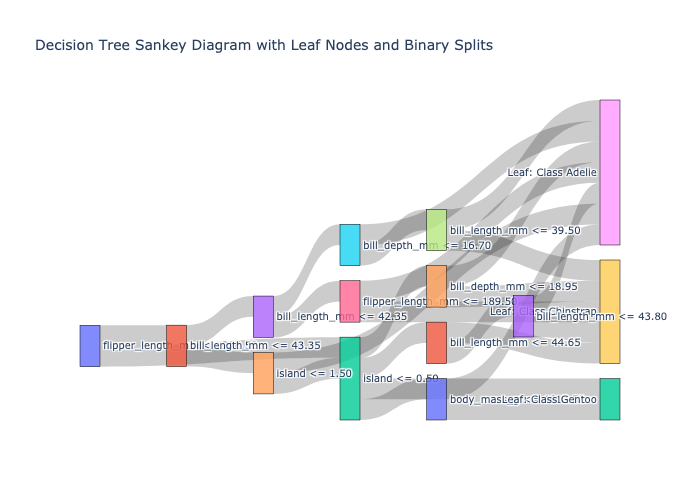

In [5]:
import plotly.io as pio
from IPython.display import Image

# Generate and display your Plotly Sankey diagram
dt.create_sankey()

# Save the Plotly figure as a PNG image
dt.fig.write_image("sankey_diagram.png")

# Display the image in the notebook
Image("sankey_diagram.png")
